In [1]:
import networkx as nx
import nltk
from nltk.corpus import wordnet as wn

In [22]:
# Create graph structure for words
def graph_synsets(terms, pos=wn.NOUN, depth=2): # defining a function to construct a graph with nodes and edges
    '''
    input: list of terms to grow the graph from
    output: an undirected graph of terms
    '''
    G=nx.Graph(name="WordNet Synsets Graph for {}".format(", ".join(terms)), depth=depth) #name is added for quick identification
    def add_term_links(G,term,current_depth): #this function adds synonyms by looking up the NLTK wn.synsets() function and returns all the possible synoynms for this word
        for syn in wn.synsets(term): #for each synonym
            for lem in syn.lemma_names(): # take its lemma or root word
                G.add_edge(term, lem) #add an edge between the term and the lemma 
                if current_depth<depth:# if the max depth of the tree isn't reached then 
                    add_term_links(G,lem, current_depth+1) #continue adding adding edges between nodes until max depth is reached 
    for term in terms: # this function goes through each term in the list of terms and puts them through the adding links function to connect the nodes to the edges and then return a graph
        add_term_links(G, term, 0) # the zero sets the counter for current_depth at zero

    return G


In [23]:
gr=graph_synsets(["thing"])

In [25]:
print(nx.info(gr))
#a node's neighborhood is the set of nodes that are reachable from that specific node by travelling along edges
# the size of the neighborhood identifies the node's degree
#average degree of a graph reflects the average size of all neighborhoods within that graph

Name: WordNet Synsets Graph for thing
Type: Graph
Number of nodes: 116
Number of edges: 156
Average degree:   2.6897


In [26]:
nx.diameter(gr) # diameter is number of nodes traversed in the shortest path between two distant nodes

5

### Key Questions to consider when analyzing a graph structure
- what is the depth or diameter of the graph?
- is it fully connected? (is there a pathway to every possible pair of nodes?)
- if there are disconnects, what are their sizes and other features?
- Can we extract a subgroup (or ego-graph) or a particular node?
- can we create a subgraph which contains specific filtered type of information 
- can we insert nodes or edges of different types to create different styles or structures?

## Visual Analysis of graphs

The spring block model is a popular mechanism for visualizing graphs. Every node is seen as a block and every edge is seen as a spring that push and pull based on strength of edge

In [41]:
import matplotlib.pyplot as plt

def draw_text_graph(G):
    pos=nx.spring_layout(G, scale=18)
    nx.draw_networkx_nodes( G, pos, node_colour='white', linewidths=0, node_size=500)

    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, edge_color='lightgrey')

    plt.tick_params(
        axis='both', #changes apply to both the x and y-axis
        which='both', #both major and minor ticks are affected
        bottom='off', # ticks off along bottom
        left='off', # ticks off along left edge
        labelbottom='off', #ticks off labels along bottom
        labelleft='off' #ticks off along left edge
    )
    plt.show()

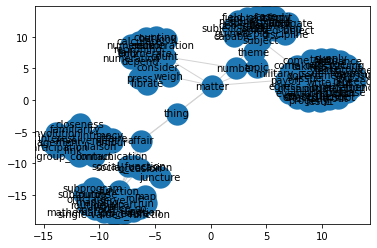

In [42]:
draw_text_graph(gr)